In [586]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

## Loading and Pre-Processing/Cleaning Data

In [587]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [588]:
print(df.columns)
print(df.shape)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
(9240, 37)


In [589]:
# Getting the percentage of NaN values in the respective columns and rounding it off to two digits
#df= pd.DataFrame(round((x1.isnull().sum()/len(x1))*100,2))
#df
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [591]:
# Converting/Replacing the 'select' values with NaN
df=df.replace('Select', np.nan)

In [592]:
# Getting the percentage of NaN values in the respective columns and rounding it off to two digits
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

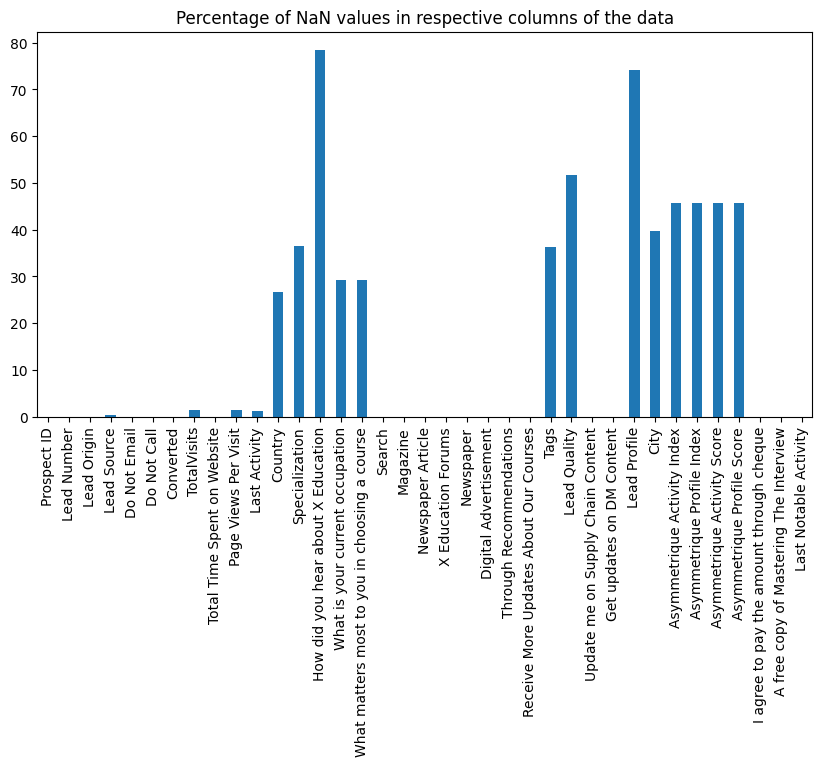

In [593]:
# PLotting the graph to visualize null values in all the columns of the dataset
plt.figure(figsize= (10,5))
round((df.isnull().sum()/len(df))*100,2).plot.bar()
plt.title('Percentage of NaN values in respective columns of the data')
plt.show()

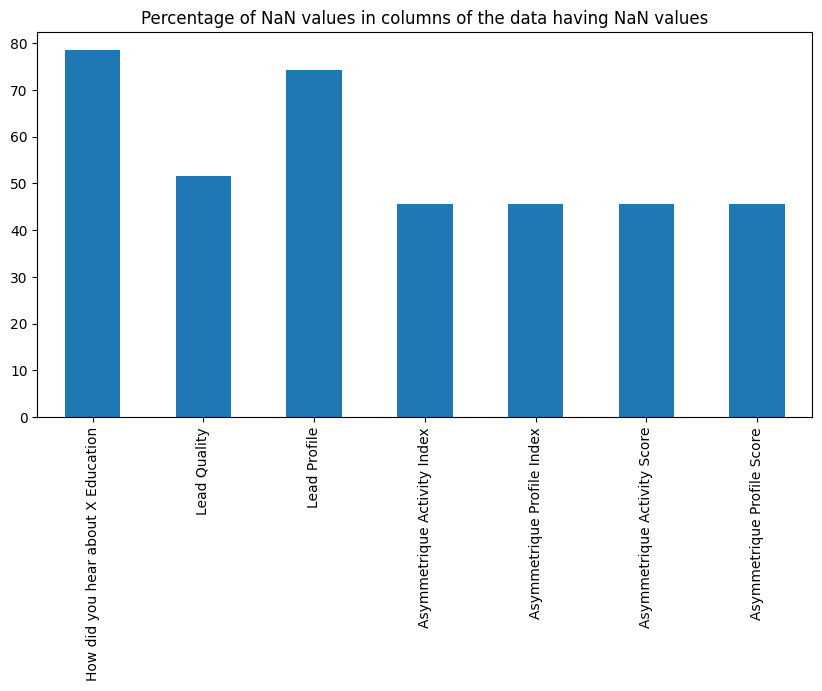

In [594]:
#Plotting out columns which have  null values greater than 40%
plt.figure(figsize= (10,5))
x2 = round((df.isnull().sum()/len(df))*100,2)
x3 = x2[x2>40]
x3.plot.bar()
plt.title('Percentage of NaN values in columns of the data having NaN values')
plt.show()

In [595]:
#listing the coulmns that have NaN values greter than 40% [from series to list conversion]
x4 = list(x2[x2>40].index)
len(x4)

7

In [596]:
x4

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [597]:
# Removing columns data have more than 40% NaN values from the original dataset
# 7 coumns have percentage of NaN values greater than 30%, hence they should be removed
df.drop(labels=x4, axis=1, inplace=True)

In [598]:
# Checking whether the columns are removed from the data or not
df.shape

(9240, 30)

In [599]:
# Getting the percentage of NaN values in the respective columns and rounding it off to two digits
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Finance Management'),
  Text(1, 0, 'Human Resource Management'),
  Text(2, 0, 'Marketing Management'),
  Text(3, 0, 'Operations Management'),
  Text(4, 0, 'Business Administration'),
  Text(5, 0, 'IT Projects Management'),
  Text(6, 0, 'Supply Chain Management'),
  Text(7, 0, 'Banking, Investment And Insurance'),
  Text(8, 0, 'Travel and Tourism'),
  Text(9, 0, 'Media and Advertising'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'Healthcare Management'),
  Text(12, 0, 'Hospitality Management'),
  Text(13, 0, 'E-COMMERCE'),
  Text(14, 0, 'Retail Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'E-Business'),
  Text(17, 0, 'Services Excellence')])

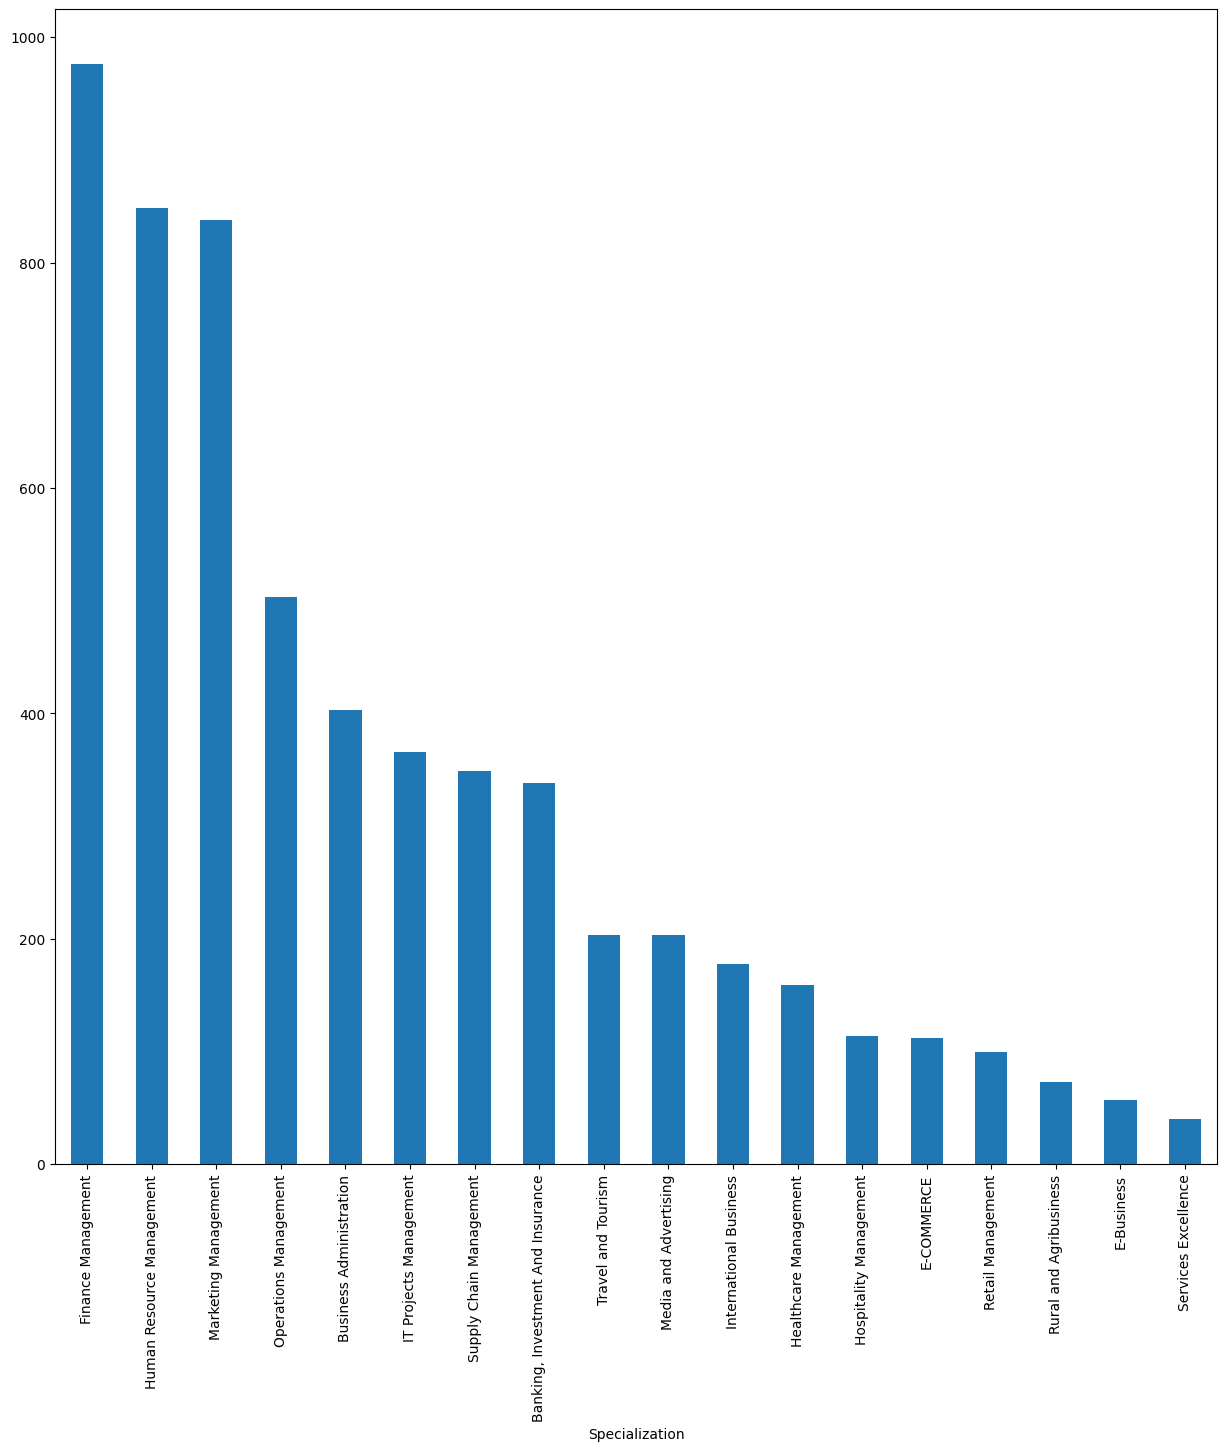

In [600]:
plt.figure(figsize= (15,15))
df['Specialization'].value_counts().plot(kind='bar');
plt.xticks(rotation=90)

In [601]:
# For column specilization, lets change NaN to others
df['Specialization'] = df['Specialization'].replace(np.nan, 'others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Will revert after reading the email'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Interested in other courses'),
  Text(3, 0, 'Already a student'),
  Text(4, 0, 'Closed by Horizzon'),
  Text(5, 0, 'switched off'),
  Text(6, 0, 'Busy'),
  Text(7, 0, 'Lost to EINS'),
  Text(8, 0, 'Not doing further education'),
  Text(9, 0, 'Interested  in full time MBA'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'invalid number'),
  Text(12, 0, 'Diploma holder (Not Eligible)'),
  Text(13, 0, 'wrong number given'),
  Text(14, 0, 'opp hangup'),
  Text(15, 0, 'number not provided'),
  Text(16, 0, 'in touch with EINS'),
  Text(17, 0, 'Lost to Others'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Want to take admission but has financial problems'),
  Text(20, 0, 'In confusion whether part time or DLP'),
  Text(21, 0, 'Interested in Next batch'),
  Text(22, 0, '

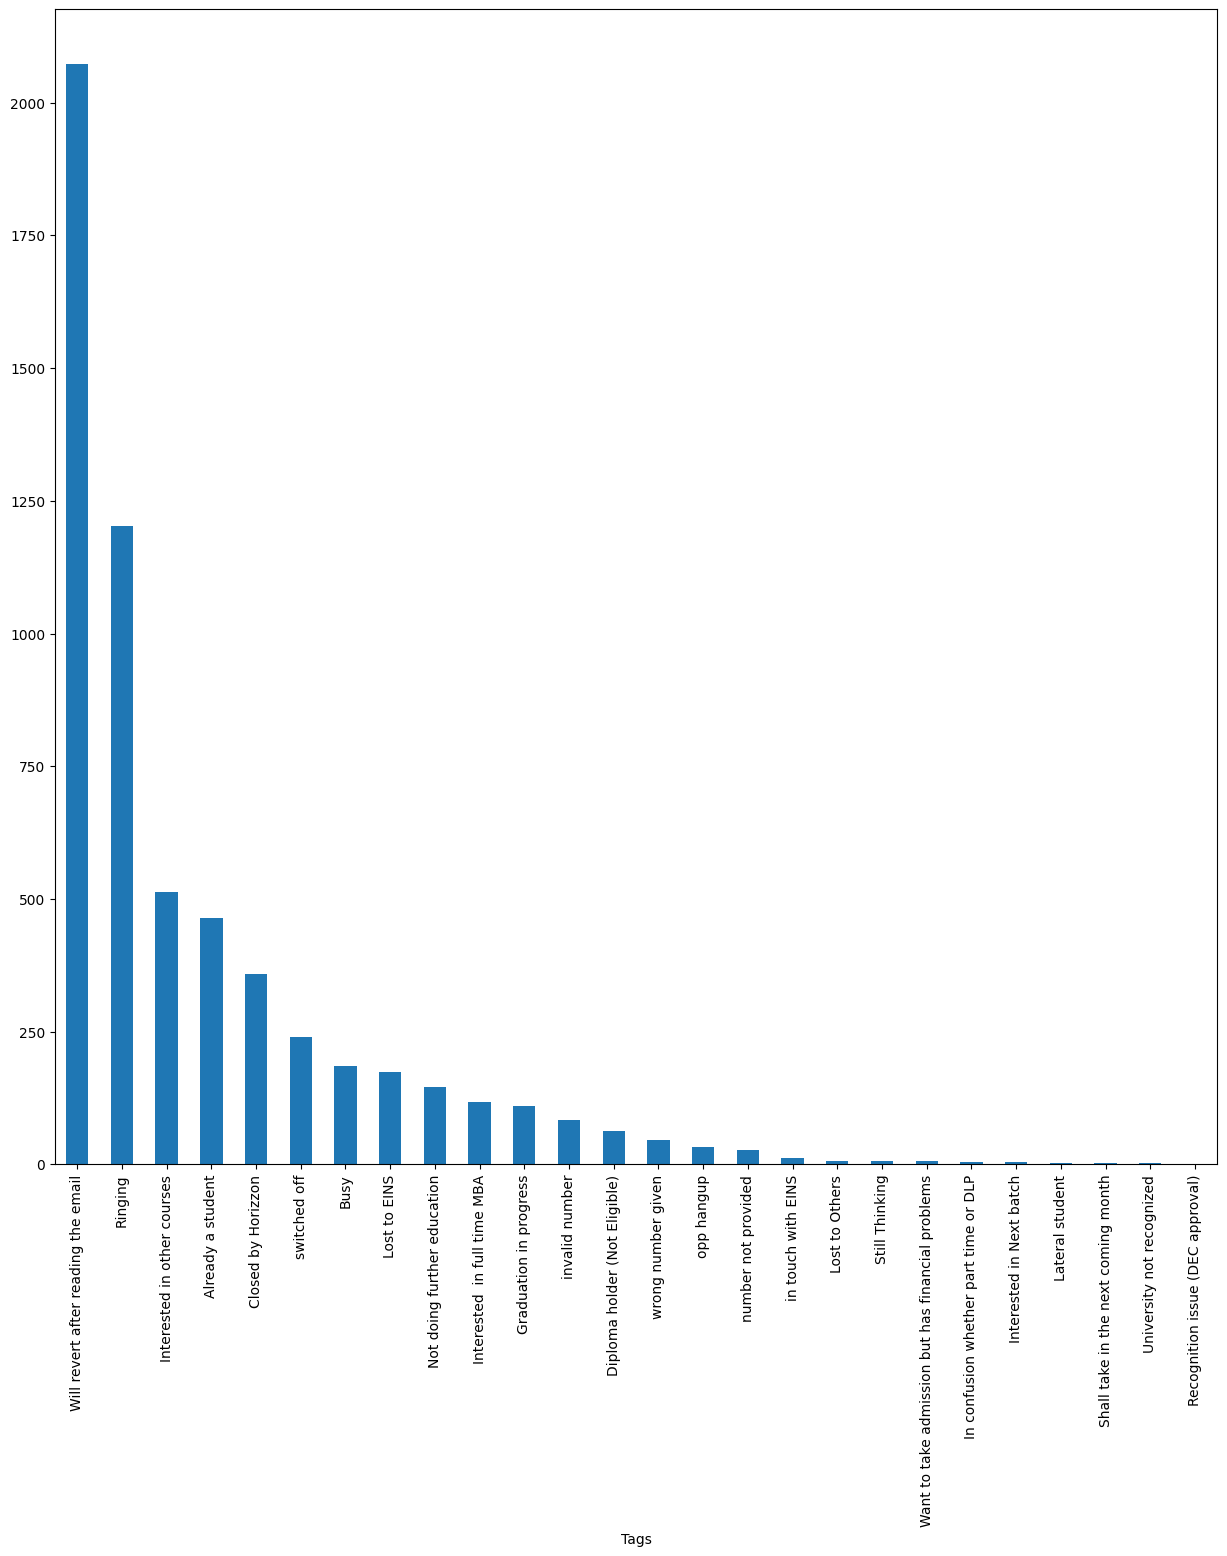

In [602]:
plt.figure(figsize= (15,15))
df['Tags'].value_counts().plot(kind='bar');
plt.xticks(rotation=90)

In [603]:
# We can impute the missing values for Tags
df['Tags']=df['Tags'].replace(np.nan, 'Will revert after reading the email')

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

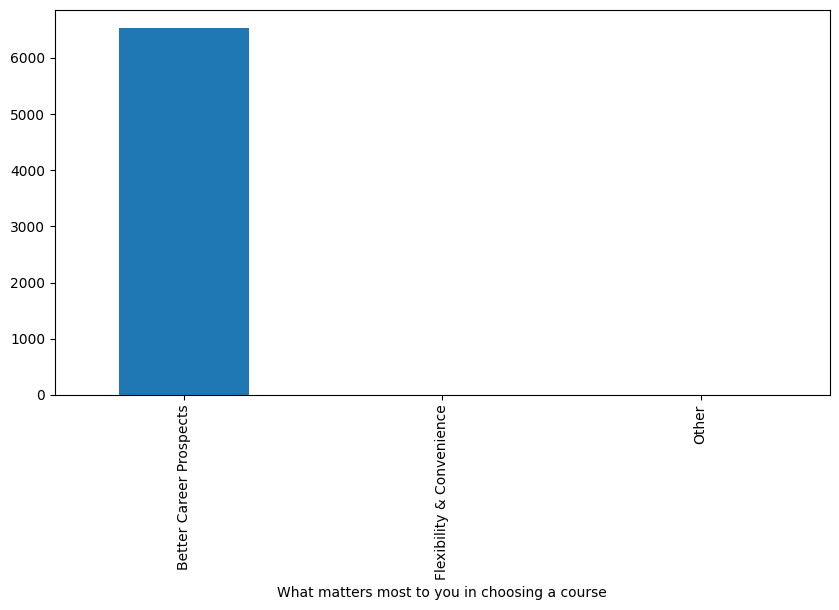

In [604]:
plt.figure(figsize= (10,5))
df['What matters most to you in choosing a course'].value_counts().plot(kind='bar');
plt.xticks(rotation=90)

In [605]:
# Since the column 'What matters most to you in choosing a course' is skewed, it can be removed
df=df.drop('What matters most to you in choosing a course',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Working Professional'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Housewife'),
  Text(5, 0, 'Businessman')])

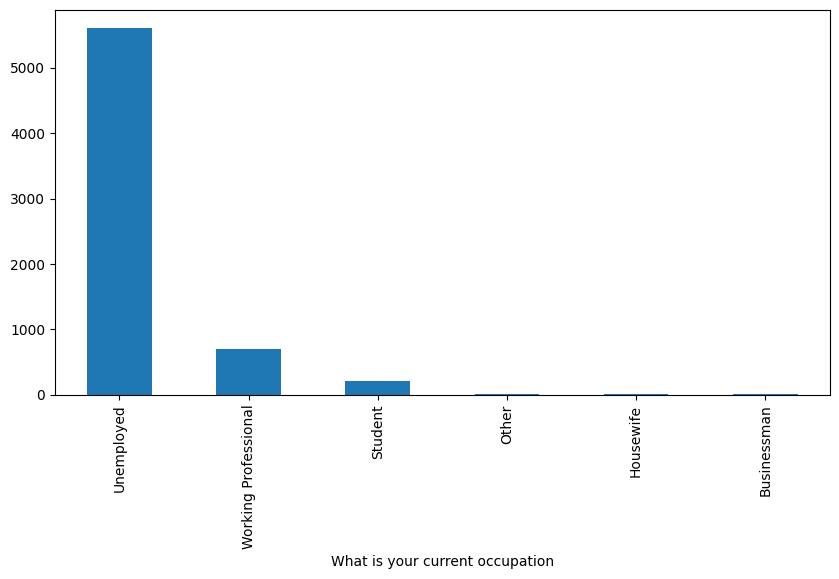

In [606]:
plt.figure(figsize= (10,5))
df['What is your current occupation'].value_counts().plot(kind='bar');
plt.xticks(rotation=90)

In [607]:
# We can impute the missing values for 'What is your current occupation'
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan, 'Unemployed')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'United Arab Emirates'),
  Text(3, 0, 'Singapore'),
  Text(4, 0, 'Saudi Arabia'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Hong Kong'),
  Text(9, 0, 'Bahrain'),
  Text(10, 0, 'Oman'),
  Text(11, 0, 'France'),
  Text(12, 0, 'unknown'),
  Text(13, 0, 'South Africa'),
  Text(14, 0, 'Nigeria'),
  Text(15, 0, 'Germany'),
  Text(16, 0, 'Kuwait'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'China'),
  Text(20, 0, 'Asia/Pacific Region'),
  Text(21, 0, 'Uganda'),
  Text(22, 0, 'Bangladesh'),
  Text(23, 0, 'Italy'),
  Text(24, 0, 'Belgium'),
  Text(25, 0, 'Netherlands'),
  Text(26, 0, 'Ghana'),
  Text(27, 0, 'Philippines'),
  Text(28, 0, 'Russia'),
  Text(29, 0, 'Switzerland'),
  

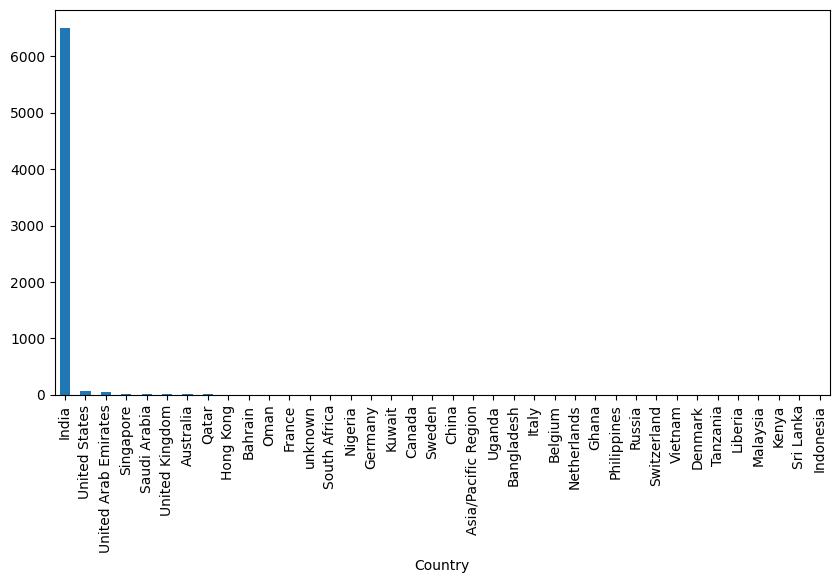

In [608]:
plt.figure(figsize= (10,5))
df['Country'].value_counts().plot(kind='bar');
plt.xticks(rotation=90)

In [609]:
# We can impute the missing values for 'Country'
df['Country']=df['Country'].replace(np.nan, 'India')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Cities'),
  Text(3, 0, 'Other Cities of Maharashtra'),
  Text(4, 0, 'Other Metro Cities'),
  Text(5, 0, 'Tier II Cities')])

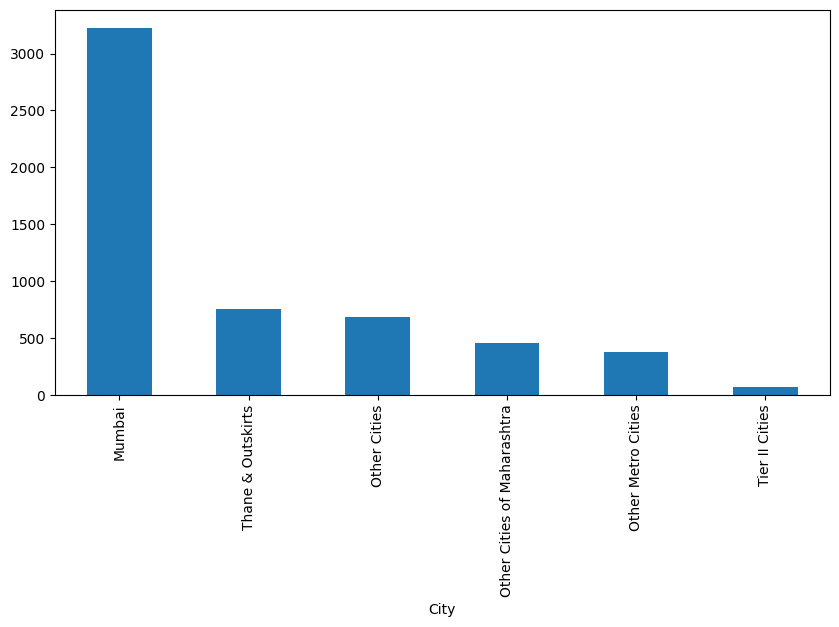

In [610]:
plt.figure(figsize= (10,5))
df['City'].value_counts().plot(kind='bar');
plt.xticks(rotation=90)

In [611]:
# We can impute the missing values for 'City'
df['City']=df['City'].replace(np.nan, 'Mumbai')

In [612]:
# Getting the percentage of NaN values in the respective columns and rounding it off to two digits
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [613]:
# Dropping the rows with null values 
df.dropna(inplace=True)

In [614]:
# Getting the percentage of NaN values in the respective columns and rounding it off to two digits
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

# EDA

In [615]:
# Univariate and Bivariate Analysis
Lead_sucess = (sum(df['Converted'])/len(df['Converted'].index))*100
Lead_sucess

37.85541106458012

In [616]:
# the leads conversion rate as per the previous data is apprx 38%

In [617]:
# Checking the data types of the cpolumns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                            

(array([0]), [Text(0, 0, 'No')])

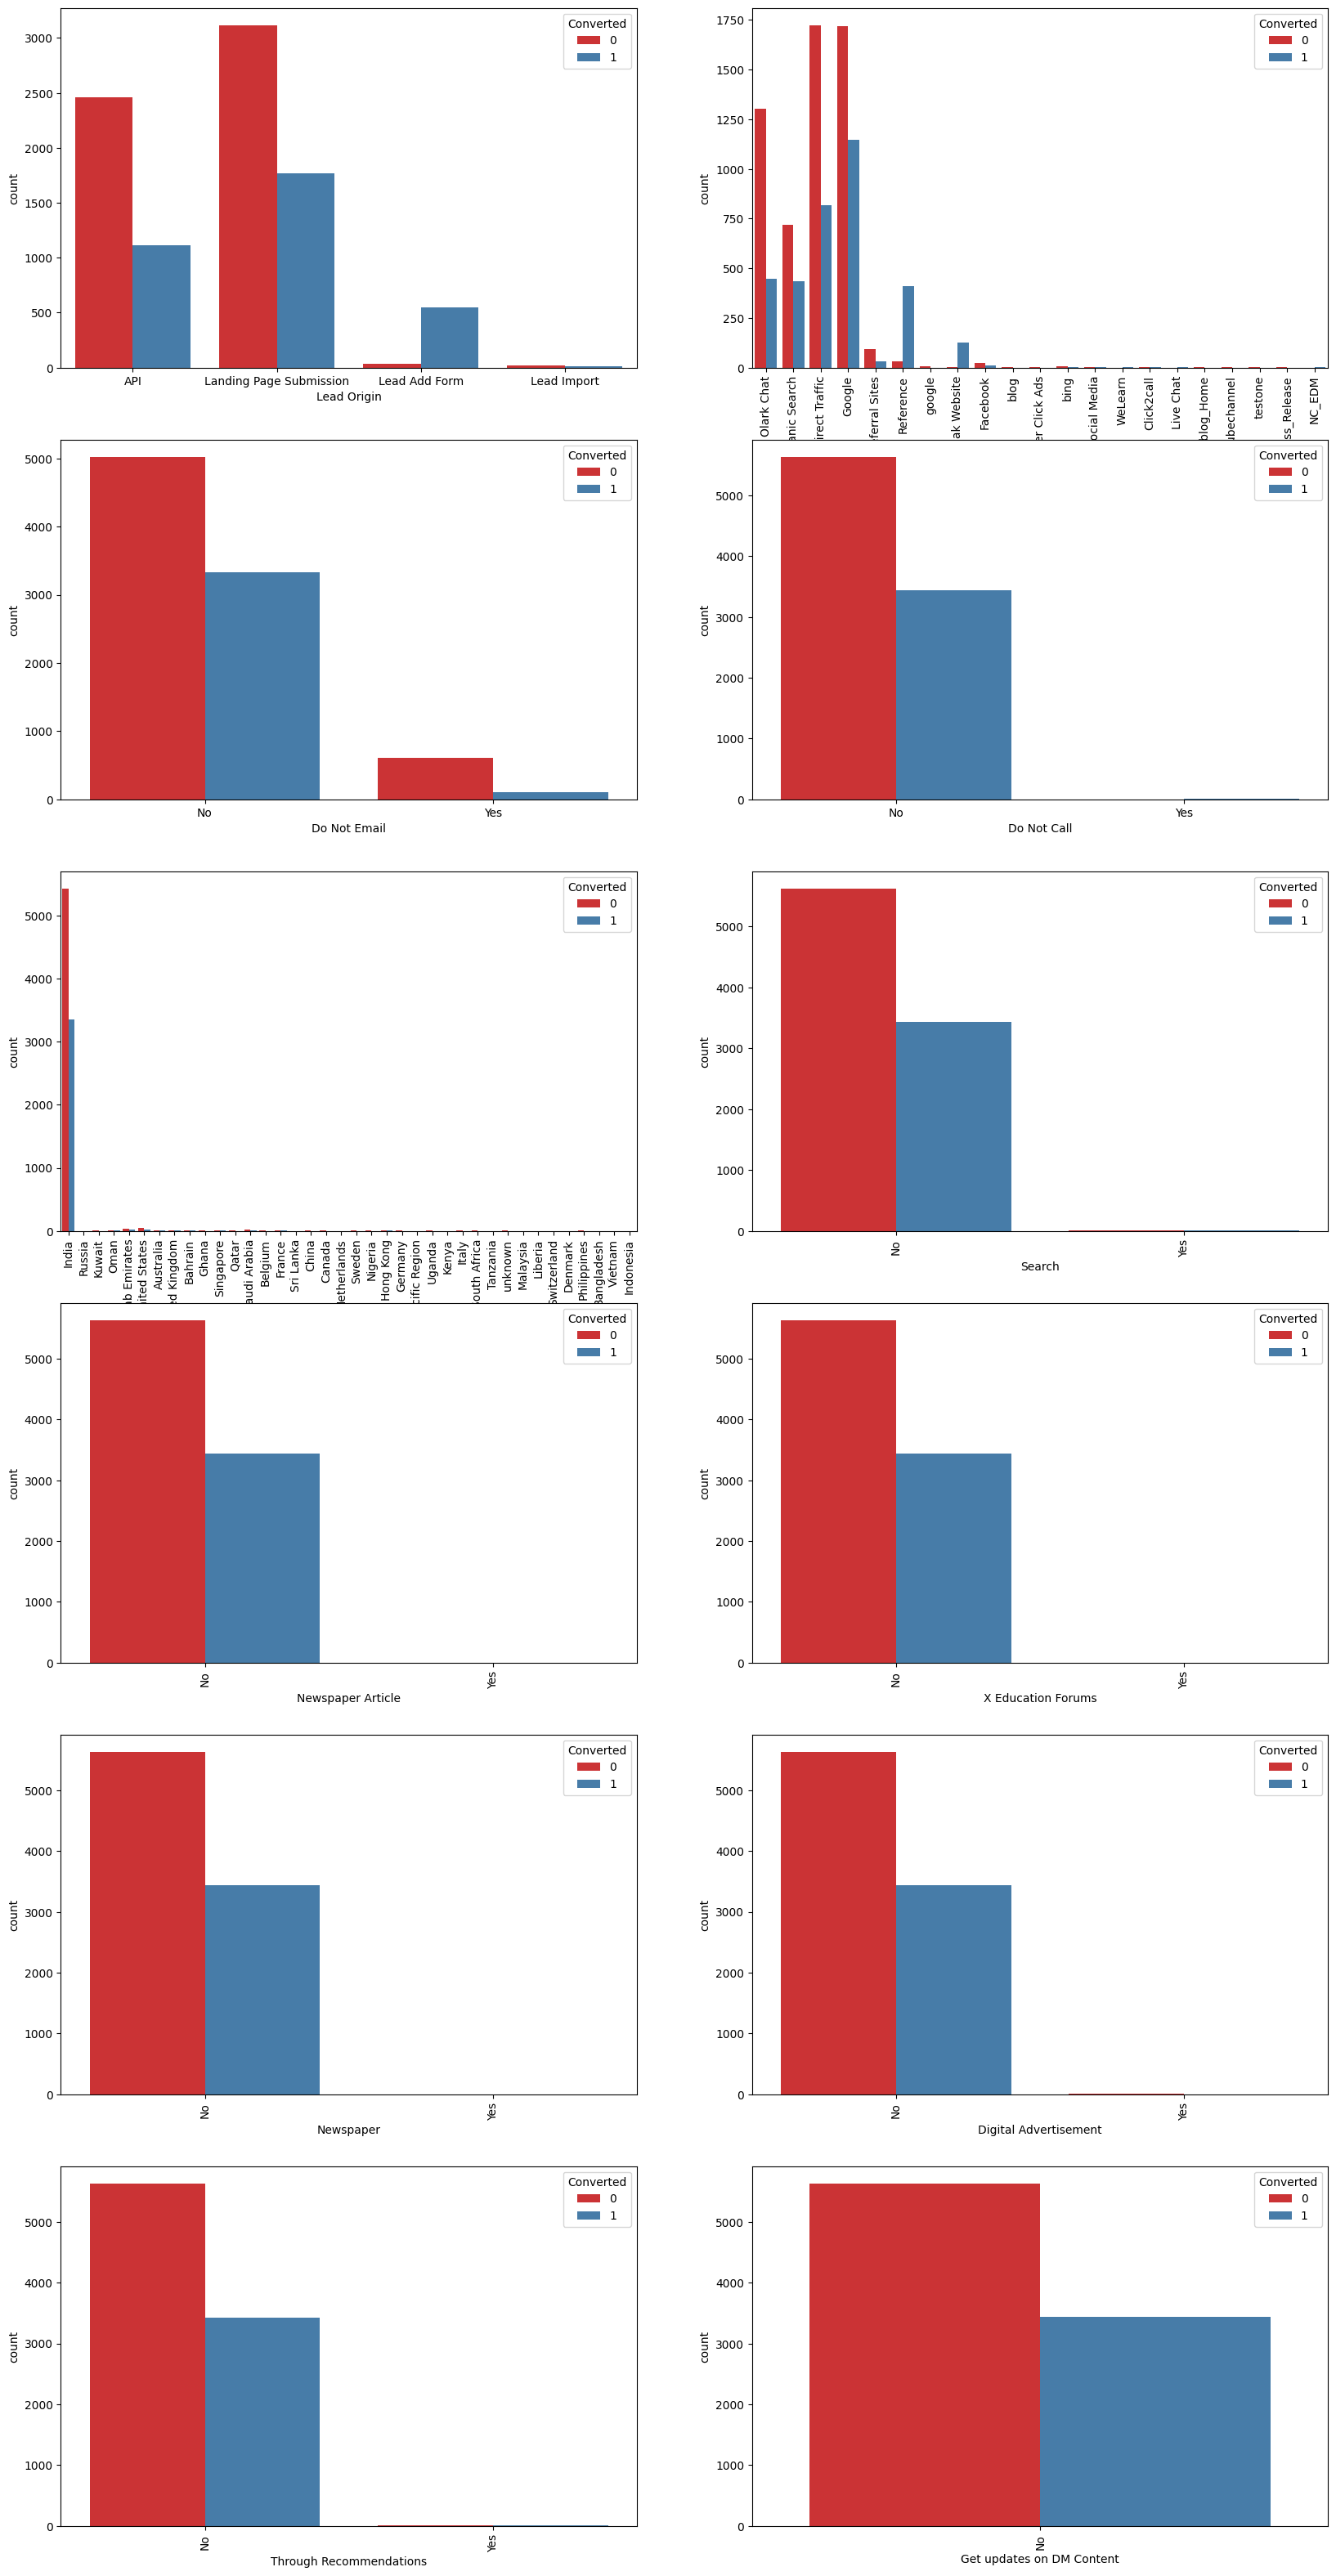

In [618]:
#Visualizing the object column
plt.figure(figsize=(20,40))

plt.subplot(6,2,1)
sns.countplot(x ='Lead Origin', hue = 'Converted', data= df, palette='Set1')

plt.subplot(6,2,2)
sns.countplot(x ='Lead Source', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

plt.subplot(6,2,3)
sns.countplot(x ='Do Not Email', hue = 'Converted', data= df, palette='Set1')

plt.subplot(6,2,4)
sns.countplot(x ='Do Not Call', hue = 'Converted', data= df, palette='Set1')

plt.subplot(6,2,5)
sns.countplot(x ='Country', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

plt.subplot(6,2,6)
sns.countplot(x ='Search', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

plt.subplot(6,2,7)
sns.countplot(x ='Newspaper Article', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

plt.subplot(6,2,8)
sns.countplot(x ='X Education Forums', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

plt.subplot(6,2,9)
sns.countplot(x ='Newspaper', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

plt.subplot(6,2,10)
sns.countplot(x ='Digital Advertisement', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

plt.subplot(6,2,11)
sns.countplot(x ='Through Recommendations', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

plt.subplot(6,2,12)
sns.countplot(x ='Get updates on DM Content', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

<Axes: xlabel='Lead Origin', ylabel='count'>

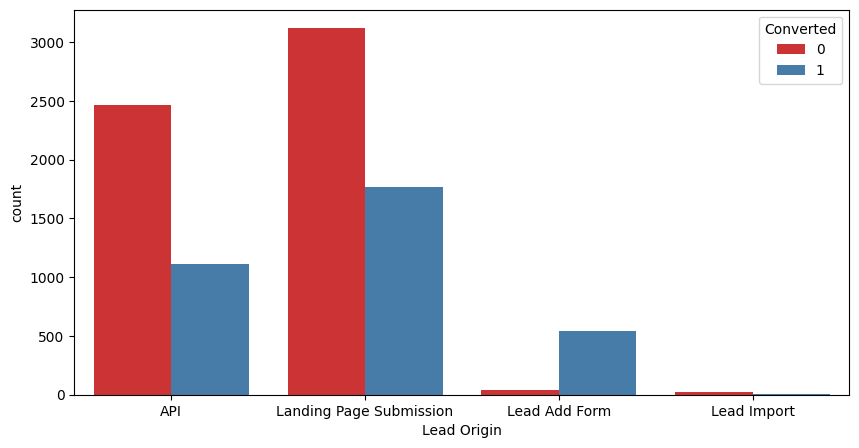

In [619]:
# lets anaalysis from where the leads are orginated through column 'Lead Origin'
plt.figure(figsize= (10,5))
sns.countplot(x ='Lead Origin', hue = 'Converted', data= df, palette='Set1')

Inference

1. ) API and Landing Page Submission leads need to be focused for increasing the leads conversion rate

2. ) Need to generate more leads for Lead Add Form as the conversion rate is high

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

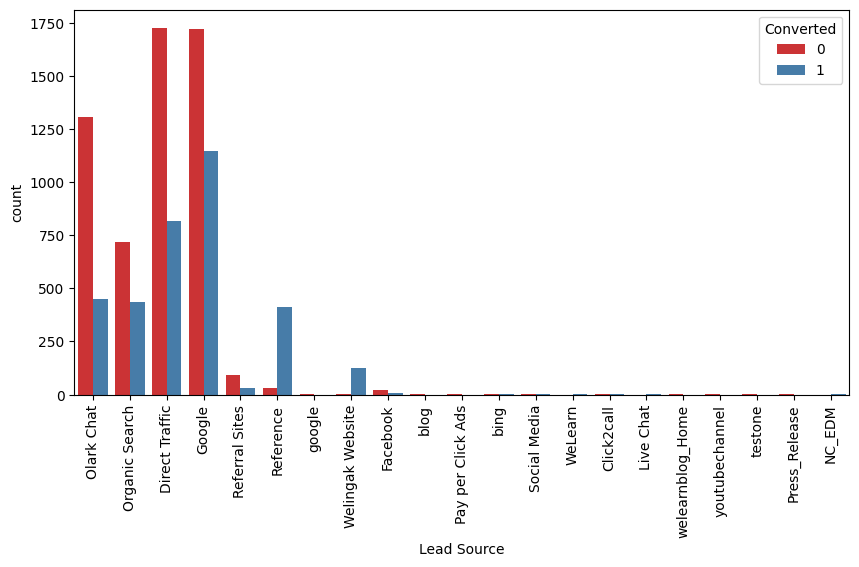

In [620]:
# lets anaalysis from which sources the leads are through column 'Lead Source'
plt.figure(figsize= (10,5))
sns.countplot(x ='Lead Source', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

In [621]:
#Replacing 'google' with 'Google'
df['Lead Source']= df['Lead Source'].replace(['google'], 'Google')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'blog'),
  Text(9, 0, 'Pay per Click Ads'),
  Text(10, 0, 'bing'),
  Text(11, 0, 'Social Media'),
  Text(12, 0, 'WeLearn'),
  Text(13, 0, 'Click2call'),
  Text(14, 0, 'Live Chat'),
  Text(15, 0, 'welearnblog_Home'),
  Text(16, 0, 'youtubechannel'),
  Text(17, 0, 'testone'),
  Text(18, 0, 'Press_Release'),
  Text(19, 0, 'NC_EDM')])

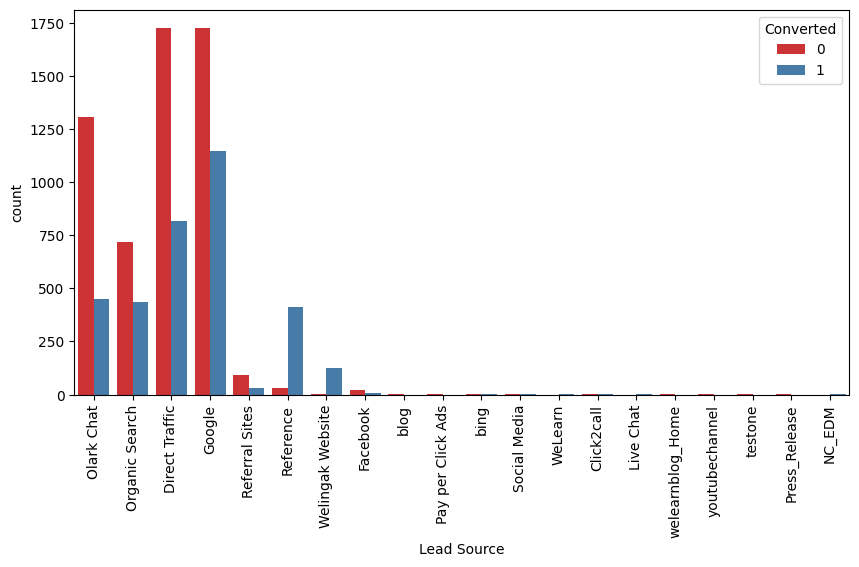

In [622]:
# lets anaalysis from which sources the leads are through column 'Lead Source'
plt.figure(figsize= (10,5))
sns.countplot(x ='Lead Source', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

In [623]:
# focusing on the main sources and replcaing other sources to catergoty others
df['Lead Source']=df['Lead Source'].replace(['NC_EDM','Press_Release','testone','youtubechannel',
                                            'welearnblog_Home','Live Chat','Click2call','WeLearn',
                                            'Social Media','bing','Pay per Click Ads','blog'], 'others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'others')])

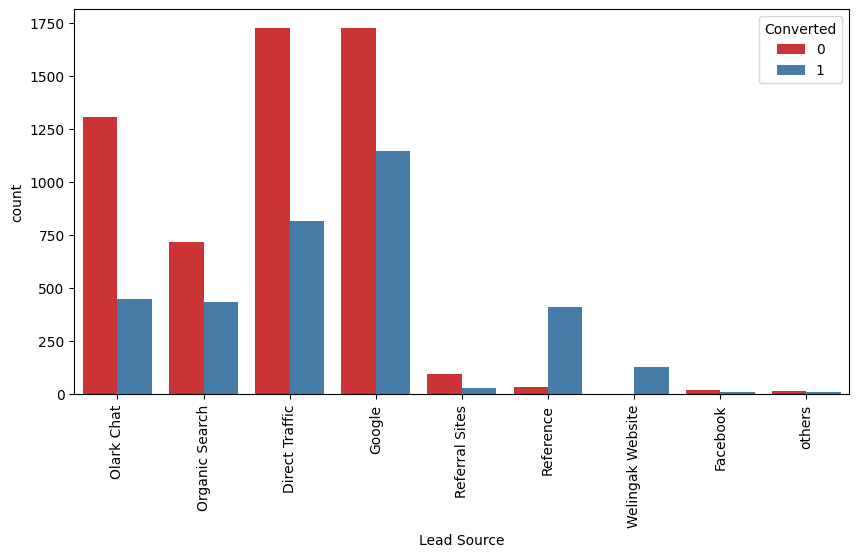

In [624]:
# lets visualize again 
plt.figure(figsize= (10,5))
sns.countplot(x ='Lead Source', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

Inference:

1. ) The focus should be on improving the lead conversion for olark chat, organic search, direct traffic, Google.
2. )Briging more leads to Reference and Welingak Website.

<Axes: xlabel='Do Not Email', ylabel='count'>

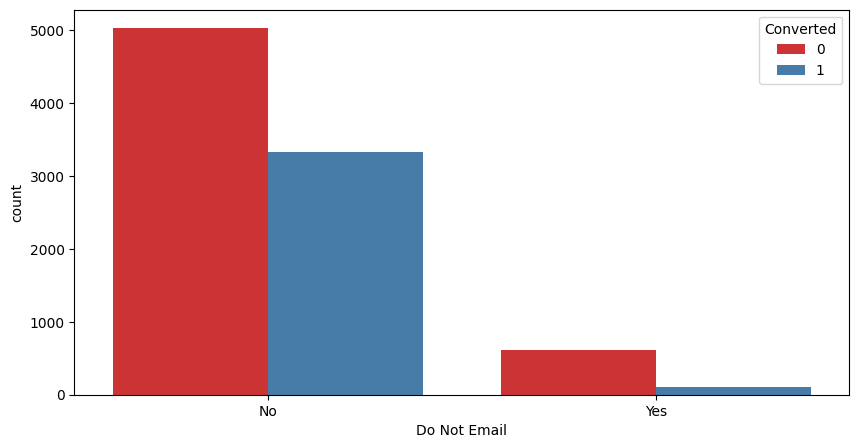

In [625]:
# column-- 'Do not Email'

# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Do Not Email', hue = 'Converted', data= df, palette='Set1')


Inference:

No inference can be drawn.

<Axes: xlabel='Do Not Call', ylabel='count'>

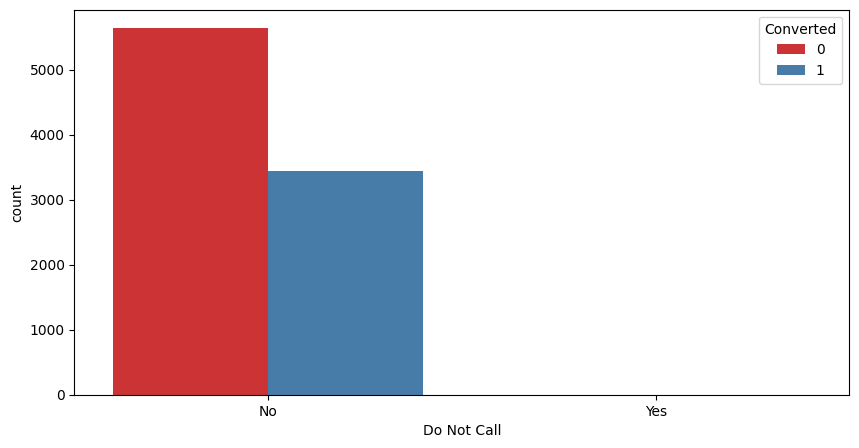

In [626]:
# column-- 'Do not Call'

# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Do Not Call', hue = 'Converted', data= df, palette='Set1')

Inference:

No inference can be drawn.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

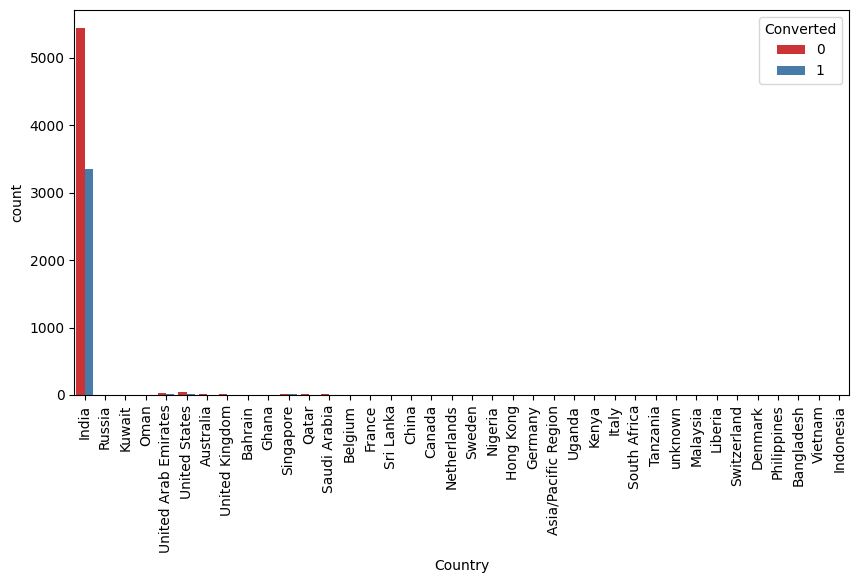

In [627]:
# column-- 'Country'
# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Country', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

Inference:

No inference can be drawn.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

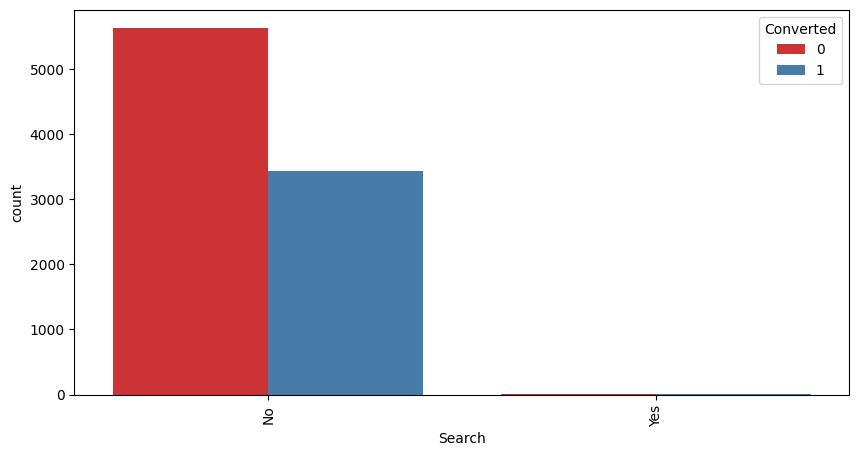

In [628]:
# column-- 'Search'
# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Search', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

Inference:

No inference can be drawn.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

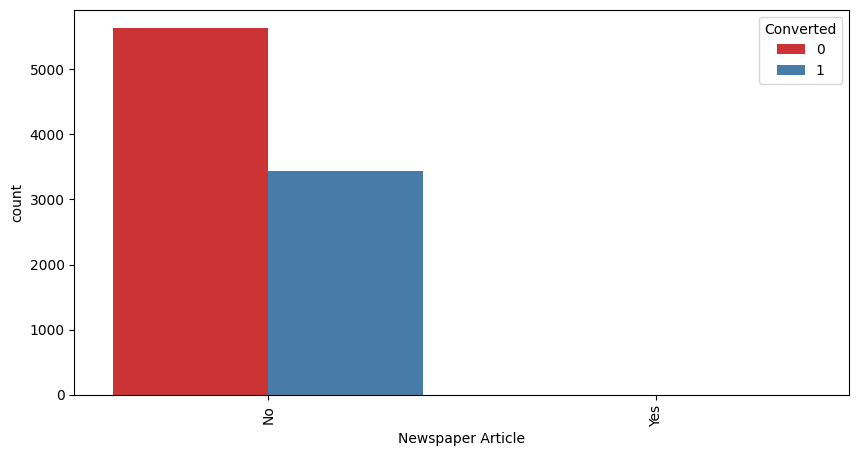

In [629]:
# column-- 'Newspaper Article'
# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Newspaper Article', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

Inference:

No inference can be drawn.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

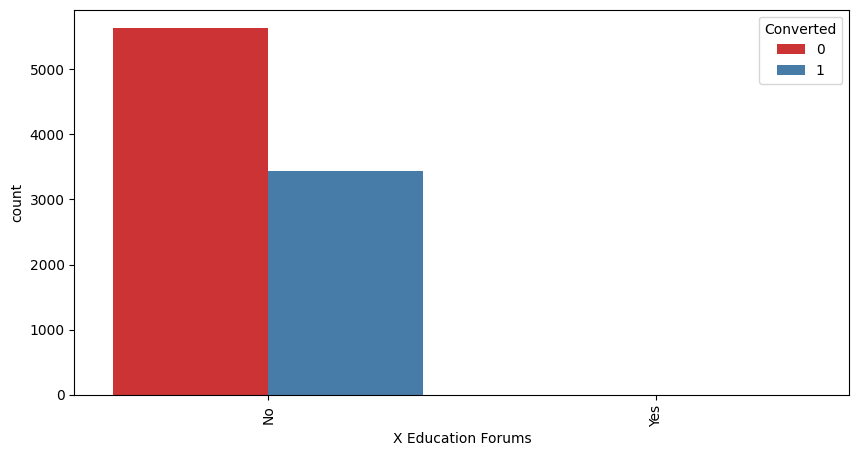

In [630]:
# column-- 'X Education Forums'
# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='X Education Forums', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

Inference:

No inference can be drawn.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

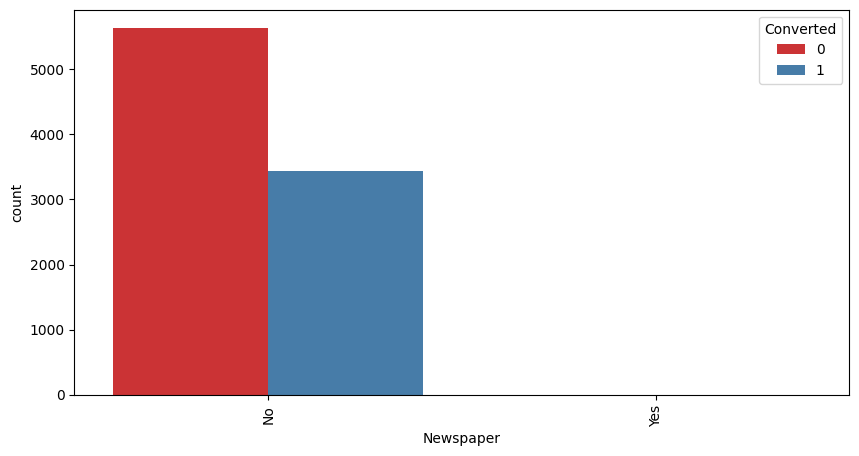

In [631]:
# column-- 'Newspaper'
# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Newspaper', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

Inference:

No inference can be drawn.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

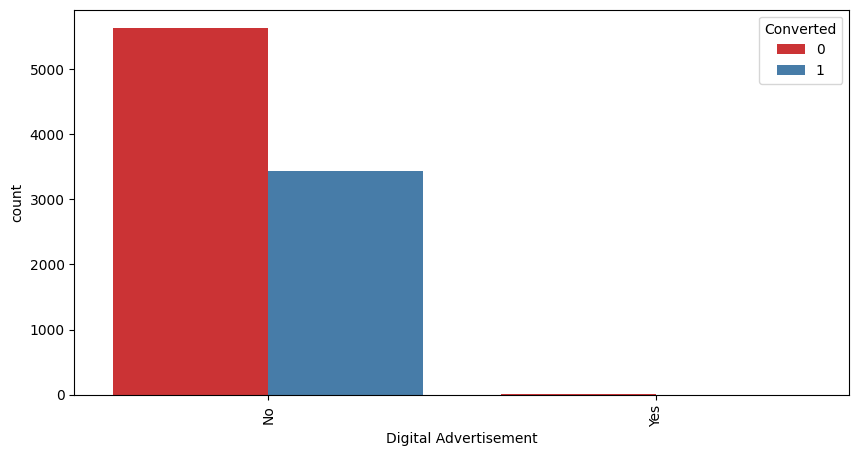

In [632]:
# column-- 'Digital Advertisement'
# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Digital Advertisement', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

Inference:

No inference can be drawn.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

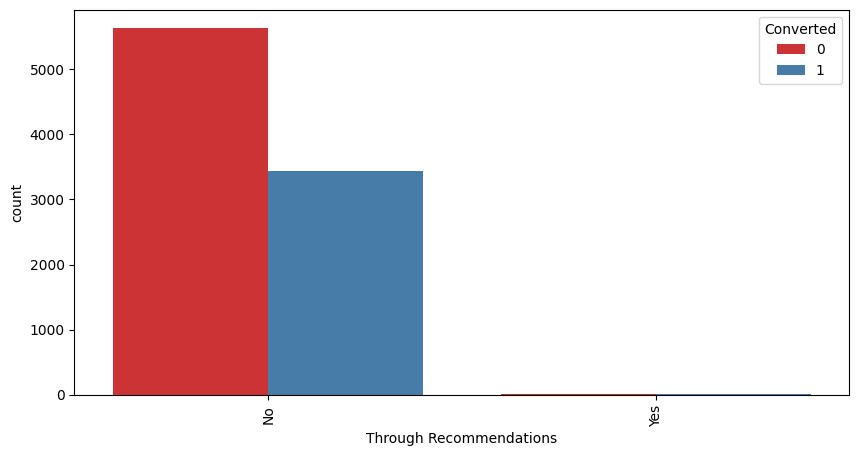

In [633]:
# column-- 'Through Recommendations'
# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Through Recommendations', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

Inference:

No inference can be drawn.

(array([0]), [Text(0, 0, 'No')])

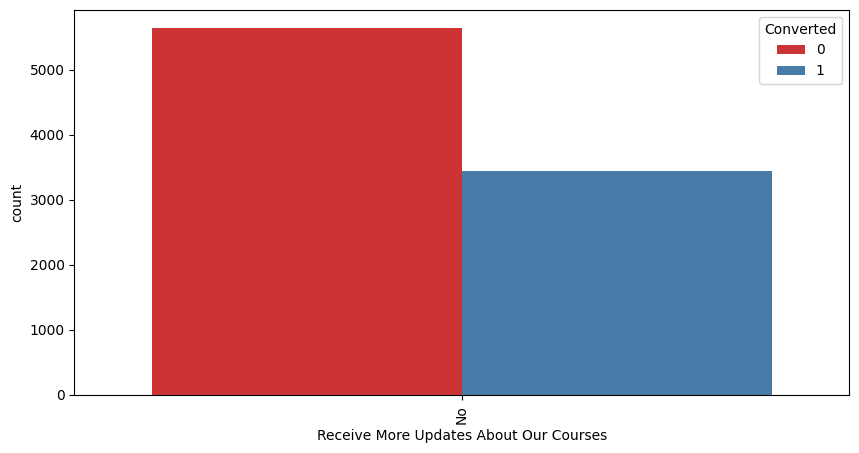

In [634]:
# column-- 'Receive More Updates About Our Courses'
# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Receive More Updates About Our Courses', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

Inference:

No inference can be drawn.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

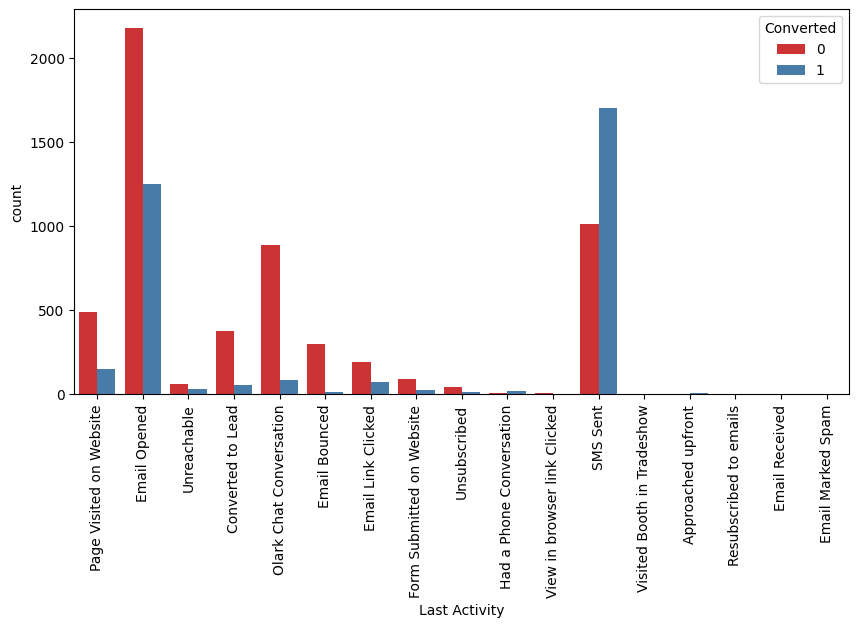

In [635]:
# column-- 'Last Activity'
# lets visualize 
plt.figure(figsize= (10,5))
sns.countplot(x ='Last Activity', hue = 'Converted', data= df, palette='Set1')
plt.xticks(rotation=90)

In [636]:
# focusing on the main sources and replcaing other sources to catergoty other_activity
df['Last Activity']=df['Last Activity'].replace(['Email Marked Spam', 'Email Received',
                                                 'Resubscribed to emails', 'Approached upfront',
                                                'Visited Booth in Tradeshow', 'View in browser link Clicked',
                                                'Had a Phone Conversation'], 'Other_Activity')

Inference:

1. )Most leads have opend E-mail.
2. )Conversion rates fro leads with SMS Sent is high.

In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                            

In [638]:
# Removing the not inferencial columns 
df.drop(['Lead Number', 'A free copy of Mastering The Interview',
            'I agree to pay the amount through cheque','Get updates on DM Content', 
            'Update me on Supply Chain Content','Receive More Updates About Our Courses',
            'Through Recommendations','Digital Advertisement','Newspaper','X Education Forums', 
            'Newspaper Article','Magazine','Search','Country','Tags'], axis=1, inplace=True)

In [639]:
df.shape

(9074, 14)

In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

In [641]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Mumbai,Modified


<Axes: >

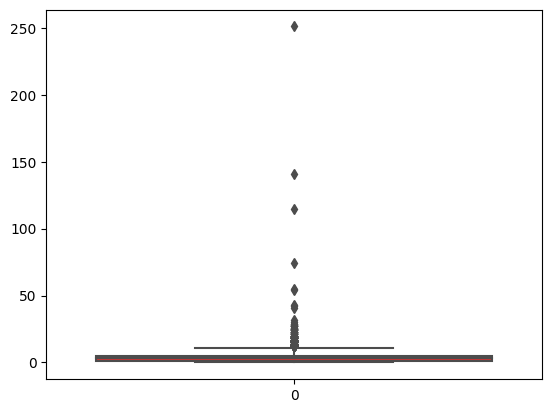

In [642]:
#column--TotalVisits
sns.boxplot(df['TotalVisits'], orient='vert', palette='Set1')

In [643]:
# there are outliers in the data. Outliers can be capped.
per_cap = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= per_cap[0]]=per_cap[0]
df['TotalVisits'][df['TotalVisits'] >= per_cap[1]]=per_cap[1]

C:\Users\Shahvaib1\AppData\Local\Temp\ipykernel_142388\2116110701.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['TotalVisits'][df['TotalVisits'] <= per_cap[0]]=per_cap[0]
C:\Users\Shahvaib1\AppData\Local\Temp\ipykernel_142388\211611

<Axes: >

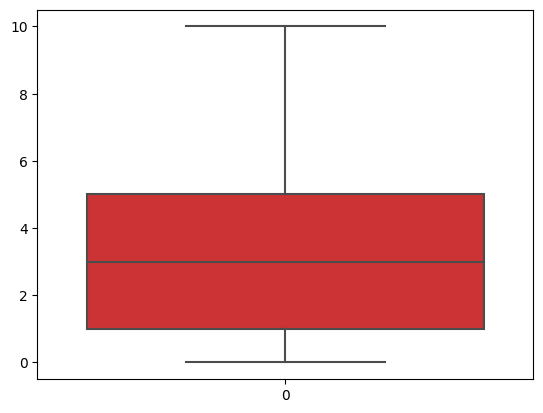

In [644]:
sns.boxplot(df['TotalVisits'],orient='vert', palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

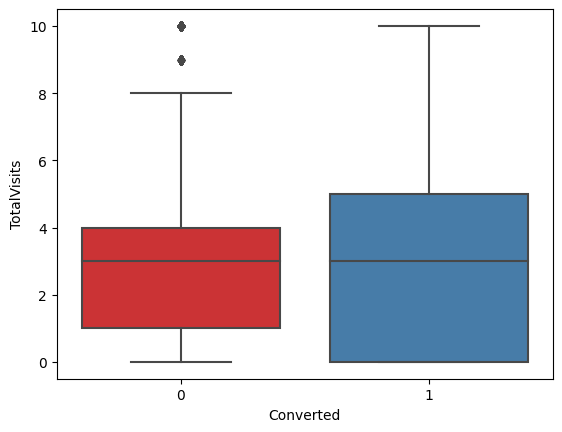

In [645]:
sns.boxplot(y='TotalVisits', x ='Converted', data= df, palette='Set1')

Inference:

No inference can be drawn.

<Axes: >

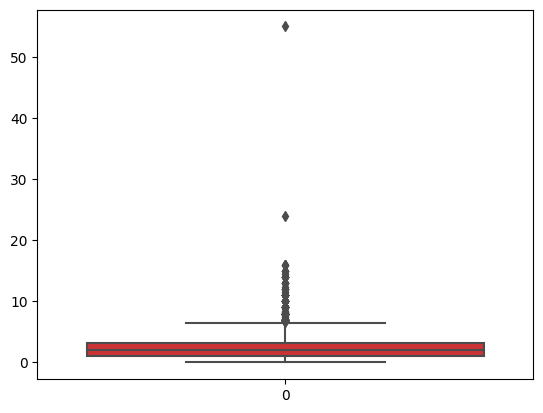

In [646]:
#column--Page Views Per Visit
sns.boxplot(df['Page Views Per Visit'], orient='vert', palette='Set1')

In [647]:
# there are outliers in the data. Outliers can be capped.
per_cap = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= per_cap[0]]=per_cap[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= per_cap[1]]=per_cap[1]

C:\Users\Shahvaib1\AppData\Local\Temp\ipykernel_142388\3488404431.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Page Views Per Visit'][df['Page Views Per Visit'] <= per_cap[0]]=per_cap[0]
C:\Users\Shahvaib1\AppData\Local\Temp\ipyke

<Axes: >

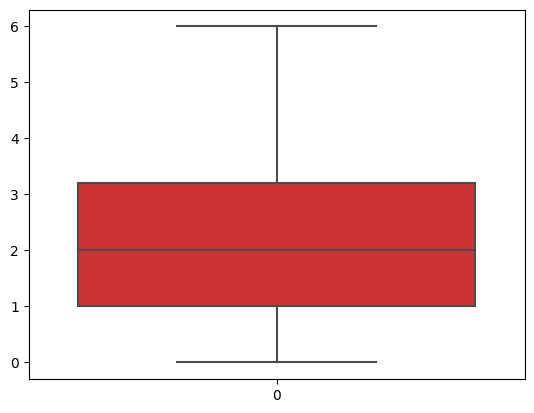

In [648]:
sns.boxplot(df['Page Views Per Visit'],orient='vert', palette='Set1')

## Data Preparation

In [649]:
# Converting binary variables to 1/0
column_list=['Do Not Email','Do Not Call']

def binary_conv_funct(x):
    return x.map({'Yes':1, 'No':0})
df[column_list]=df[column_list].apply(binary_conv_funct)

In [650]:
#creating dummy varaibles

In [651]:
Lead_Origin_dummy = pd.get_dummies(df[['Lead Origin']], drop_first=True)
for i in Lead_Origin_dummy.columns:
   Lead_Origin_dummy[i]=Lead_Origin_dummy[i].astype(int)
Lead_Origin_dummy.drop_first=True

Lead_Origin_dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
9235,1,0,0
9236,1,0,0
9237,1,0,0
9238,1,0,0


In [652]:
Lead_Source_dummy = pd.get_dummies(df[['Lead Source']], drop_first=True)
for i in Lead_Source_dummy.columns:
   Lead_Source_dummy[i]=Lead_Source_dummy[i].astype(int)
Lead_Source_dummy.drop_first=True

In [653]:
Last_Activity_dummy = pd.get_dummies(df[['Last Activity']], drop_first=True)
for i in Last_Activity_dummy.columns:
   Last_Activity_dummy[i]=Last_Activity_dummy[i].astype(int)
Last_Activity_dummy.drop_first=True

In [654]:
Specialization_dummy = pd.get_dummies(df[['Specialization']], drop_first=True)
for i in Specialization_dummy.columns:
   Specialization_dummy[i]=Specialization_dummy[i].astype(int)
Specialization_dummy.drop_first=True

In [655]:
x1_dummy = pd.get_dummies(df[['What is your current occupation']], drop_first=True)
for i in x1_dummy.columns:
   x1_dummy[i]=x1_dummy[i].astype(int)
x1_dummy.drop_first=True

In [656]:
City_dummy = pd.get_dummies(df[['City']], drop_first=True)
for i in City_dummy.columns:
   City_dummy[i]=City_dummy[i].astype(int)
City_dummy.drop_first=True

In [657]:
x2_dummy = pd.get_dummies(df[['Last Notable Activity']], drop_first=True)
for i in x2_dummy.columns:
   x2_dummy[i]=x2_dummy[i].astype(int)
x2.drop_first=True

In [658]:
# Concatenating the dummy_variable columns to df
df=pd.concat([df, Lead_Origin_dummy, Lead_Source_dummy,Last_Activity_dummy,Specialization_dummy,
             x1_dummy,City_dummy,x2_dummy], axis=1)

In [659]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [660]:
df=df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'What is your current occupation', 'City', 'Last Notable Activity'], axis=1)

In [661]:
df.shape

(9074, 71)

In [662]:
# Splitting the df into train and test set.

X = df.drop(['Prospect ID','Converted'], axis=1)

In [663]:
X.shape

(9074, 69)

In [664]:
y= df['Converted']

In [665]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [666]:
# Scaling the features
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [667]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [668]:
X_train.shape

(6351, 69)

In [669]:
#feature selection using RFE
lm=LogisticRegression()

#lm.fit(X_train, y_train)

rfe=RFE(lm, n_features_to_select = 20)
rfe=rfe.fit(X_train, y_train)

C:\Users\Shahvaib1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shahvaib1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [670]:
# listing the features selcted via RFE
col_rfe=X_train.columns[rfe.support_]
col_rfe

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model Building

In [671]:
# Model1 using statsModel package

#Adding constant
X_train_rfe = sm.add_constant(X_train[col_rfe])

#run the log model
logm1 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
result1= logm1.fit()

#Summary
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Sun, 17 Mar 2024   Deviance:                       5180.6
Time:                        00:22:26   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

In [672]:
# Dropping the column with higher p-values
col_rfe_2 = col_rfe.drop('What is your current occupation_Housewife')
col_rfe_2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_others', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [673]:
# Model2 using statsModel package

#Adding constant
X_train_rfe = sm.add_constant(X_train[col_rfe_2])

#run the log model
logm2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
result2= logm2.fit()

#Summary
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Sun, 17 Mar 2024   Deviance:                       5184.5
Time:                        00:22:26   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

In [674]:
# Dropping the column with higher p-values
col_rfe_3 = col_rfe_2.drop('Last Notable Activity_Had a Phone Conversation')
col_rfe_3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_others', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [675]:
# Model3 using statsModel package

#Adding constant
X_train_rfe = sm.add_constant(X_train[col_rfe_3])

#run the log model
logm3 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
result3= logm3.fit()

#Summary
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Sun, 17 Mar 2024   Deviance:                       5186.1
Time:                        00:22:26   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

In [676]:
# Dropping the column with higher p-values
col_rfe_4 = col_rfe_3.drop('What is your current occupation_Student')
col_rfe_4

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [677]:
# Model4 using statsModel package

#Adding constant
X_train_rfe = sm.add_constant(X_train[col_rfe_4])

#run the log model
logm4 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
result4= logm4.fit()

#Summary
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Sun, 17 Mar 2024   Deviance:                       5189.0
Time:                        00:22:26   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

In [678]:
# Dropping the column with higher p-values
col_rfe_5 = col_rfe_4.drop('Lead Origin_Lead Add Form')
col_rfe_5

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [679]:
# Model5 using statsModel package

#Adding constant
X_train_rfe = sm.add_constant(X_train[col_rfe_5])

#run the log model
logm5 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
result5= logm5.fit()

#Summary
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Sun, 17 Mar 2024   Deviance:                       5192.3
Time:                        00:22:26   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

#### Checking for VIF

In [680]:
# Def function for VIF calculation
def VIF(xx):
    vif=pd.DataFrame()
    vif['features']=xx.columns
    vif['vif']=[variance_inflation_factor(xx.values, i) for i in range(xx.shape[1])]
    vif['vif']=round(vif['vif'],2)
    vif=vif.sort_values(by='vif',ascending=False)
    return(vif)

In [681]:
VIF(df[col_rfe_5])

,features,vif
12,What is your current occupation_Unemployed,10.73
2,Lead Origin_Landing Page Submission,5.79
11,Specialization_others,3.95
1,Total Time Spent on Website,2.24
4,Lead Source_Olark Chat,2.23
14,Last Notable Activity_Modified,1.84
13,What is your current occupation_Working Profes...,1.78
9,Last Activity_SMS Sent,1.61
7,Last Activity_Olark Chat Conversation,1.60
5,Lead Source_Reference,1.40


In [682]:
# Dropping the column with higher VIF
col_rfe_6 = col_rfe_5.drop('What is your current occupation_Unemployed')
col_rfe_6

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [683]:
# Model6 using statsModel package

#Adding constant
X_train_rfe = sm.add_constant(X_train[col_rfe_6])

#run the log model
logm6 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
result6= logm6.fit()

#Summary
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Sun, 17 Mar 2024   Deviance:                       5200.0
Time:                        00:22:27   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Other_Activity                             2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_others                                   -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

In [684]:
# Dropping the column with higher p-values
col_rfe_7 = col_rfe_6.drop('Lead Origin_Lead Import')
col_rfe_7

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [685]:
# Model7 using statsModel package

#Adding constant
X_train_rfe = sm.add_constant(X_train[col_rfe_7])

#run the log model
logm7 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
result7= logm7.fit()

#Summary
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Sun, 17 Mar 2024   Deviance:                       5203.0
Time:                        00:22:27   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

In [686]:
VIF(df[col_rfe_7])

,features,vif
10,Specialization_others,2.32
2,Lead Origin_Landing Page Submission,2.23
1,Total Time Spent on Website,1.99
3,Lead Source_Olark Chat,1.95
12,Last Notable Activity_Modified,1.77
6,Last Activity_Olark Chat Conversation,1.60
8,Last Activity_SMS Sent,1.57
0,Do Not Email,1.22
11,What is your current occupation_Working Profes...,1.20
4,Lead Source_Reference,1.17


## Analysis of Model on Test Data Set

In [687]:
y_train_pred = result7.predict(X_train_rfe)

In [688]:
y_train_pred

3009    0.192492
1012    0.107074
9226    0.329484
4750    0.866550
7987    0.802188
          ...   
367     0.182758
82      0.934056
8199    0.918319
7077    0.212649
5754    0.289108
Length: 6351, dtype: float64

In [689]:
#Reshaping into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred 

array([0.19249248, 0.10707422, 0.32948401, ..., 0.91831908, 0.21264862,
       0.28910751])

In [690]:
# creating a fd wuth actual converted lead and predicted prob
y_train_pr = pd.DataFrame({'Converted':y_train.values, 'Converted_probility':y_train_pred})
y_train_pr['Prospect ID']=y_train.index
y_train_pr.head()

,Converted,Converted_probility,Prospect ID
0,0,0.192492,3009
1,0,0.107074,1012
2,0,0.329484,9226
3,1,0.866550,4750
4,1,0.802188,7987


In [691]:
# choosing arbitray cut-off prob of 0.5

y_train_pr['predicted'] = y_train_pr.Converted_probility.map(lambda x:1 if x>0.5 else 0)

In [692]:
y_train_pr

,Converted,Converted_probility,Prospect ID,predicted
0,0,0.192492,3009,0
1,0,0.107074,1012,0
2,0,0.329484,9226,0
3,1,0.866550,4750,1
4,1,0.802188,7987,1
...,...,...,...,...
6346,0,0.182758,367,0
6347,1,0.934056,82,1
6348,0,0.918319,8199,1
6349,0,0.212649,7077,0


## Confusion Matrix

In [693]:
conf_matrix=metrics.confusion_matrix(y_train_pr.Converted, y_train_pr.predicted)
print(conf_matrix)

[[3459  446]
 [ 710 1736]]


In [694]:
# Predicted        not_converted     converted 
# Actual
# not_converted        3459             446
# converted            710             1736  

In [695]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pr.Converted, y_train_pr.predicted))

0.8179814202487797


## Metrics beyond simply accuracy

In [696]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [697]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7097301717089125

In [698]:
# Let us calculate specificity
TN / float(TN+FP)

0.885787451984635

In [699]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11421254801536491


In [700]:
# positive predictive value 
print (TP / float(TP+FP))

0.7956003666361137


In [701]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8296953705924682


## Infrence:
The model specificuty is good (88%) but sensitivity is only 70%. Main reason would be the arbitatrty selection of cut-off values to 0.5.
For optimizing the selection we will go for plotting of ROC curve

In [702]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [703]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pr.Converted, y_train_pr.Converted_probility, drop_intermediate = False )

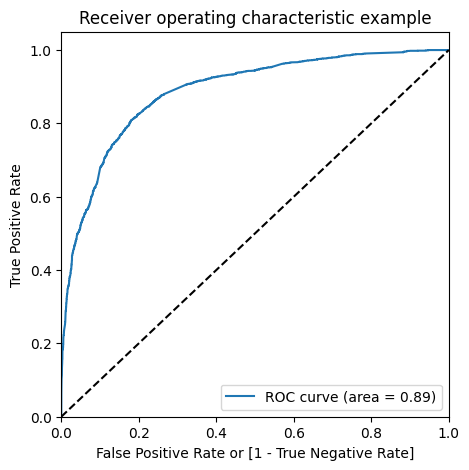

In [704]:
draw_roc(y_train_pr.Converted, y_train_pr.Converted_probility)

In [705]:
# finding the optial cutoff


In [706]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pr[i]= y_train_pr.Converted_probility.map(lambda x: 1 if x > i else 0)
y_train_pr.head()

,Converted,Converted_probility,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0


In [707]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pr.Converted, y_train_pr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.591718  0.972200  0.353393
0.2   0.2  0.749488  0.915781  0.645327
0.3   0.3  0.800976  0.851594  0.769270
0.4   0.4  0.816249  0.775961  0.841485
0.5   0.5  0.817981  0.709730  0.885787
0.6   0.6  0.798614  0.602617  0.921383
0.7   0.7  0.786963  0.529027  0.948528
0.8   0.8  0.762557  0.427228  0.972599
0.9   0.9  0.722248  0.298446  0.987708


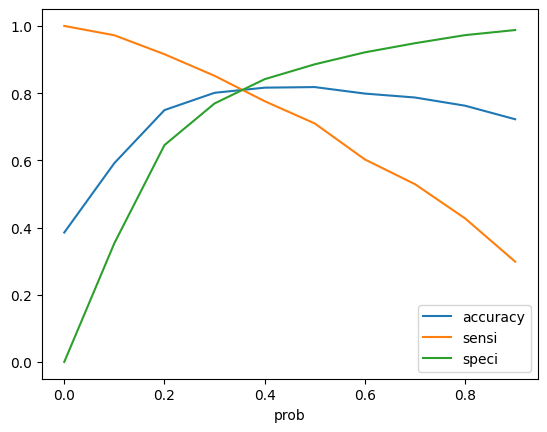

In [708]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Optimal point =0.35

In [709]:
y_train_pr['final_predicted'] = y_train_pr.Converted_probility.map( lambda x: 1 if x > 0.35 else 0)

y_train_pr.head()

,Converted,Converted_probility,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1


### Model Evalution

In [710]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pr.Converted, y_train_pr.final_predicted)

0.8132577546843017

In [711]:
confusion2 = metrics.confusion_matrix(y_train_pr.Converted, y_train_pr.final_predicted)
confusion2

array([[3173,  732],
       [ 454, 1992]], dtype=int64)

In [712]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [713]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :', TP / float(TP+FN))

Sensitivity : 0.8143908421913328


In [714]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18745198463508322


In [715]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7312775330396476


In [716]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8748276812792942


In [717]:
# Let's see the specificity of our logistic regression model
print('Specificity :', TN / float(TN+FP))

Specificity : 0.8125480153649167


In [718]:
## Precision and Recall

In [719]:
#Looking at the confusion matrix again

In [720]:
confusion = metrics.confusion_matrix(y_train_pr.Converted, y_train_pr.final_predicted)
confusion

array([[3173,  732],
       [ 454, 1992]], dtype=int64)

##### Precision
TP / TP + FP

In [721]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7312775330396476

##### Recall
TP / TP + FN

In [722]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8143908421913328

Using sklearn utilities for the same

In [723]:
from sklearn.metrics import precision_score, recall_score

In [724]:
?precision_score

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array-like, default=None
    The set of labels to include when ``average != 'binary'``, and their
    order if ``average is None``. Labels present in the data can be
    exclud

In [725]:
precision_score(y_train_pr.Converted, y_train_pr.final_predicted)

0.7312775330396476

In [726]:
recall_score(y_train_pr.Converted, y_train_pr.final_predicted)

0.8143908421913328

### Precision and recall tradeoff

In [727]:
from sklearn.metrics import precision_recall_curve

In [728]:
y_train_pr.Converted, y_train_pr.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: final_predicted, Length: 6351, dtype: int64)

In [729]:
p, r, thresholds = precision_recall_curve(y_train_pr.Converted, y_train_pr.Converted_probility)

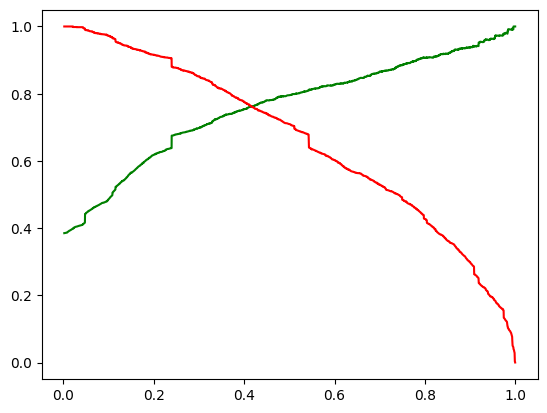

In [730]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [731]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [732]:
X_test = X_test[col_rfe_7]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0


In [733]:
X_test.shape

(2723, 14)

In [734]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [735]:
y_test_pred = result7.predict(X_test_sm)

In [736]:
y_test_pred[:10]

3271    0.126835
1490    0.968324
7936    0.109448
4216    0.803988
3830    0.129754
1800    0.628554
6507    0.343306
4821    0.297353
4223    0.918319
4714    0.329484
dtype: float64

In [737]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [738]:
# Let's see the head
y_pred_1.head()

,0
3271,0.126835
1490,0.968324
7936,0.109448
4216,0.803988
3830,0.129754


In [739]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [740]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [741]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [742]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [743]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.126835
1,1,1490,0.968324
2,0,7936,0.109448
3,1,4216,0.803988
4,0,3830,0.129754


In [744]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probility'})

In [745]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted', 'Converted_probility'])

In [746]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_probility
0,3271,0,0.126835
1,1490,1,0.968324
2,7936,0,0.109448
3,4216,1,0.803988
4,3830,0,0.129754


In [747]:
y_pred_final['final_predicted'] = y_pred_final.Converted_probility.map(lambda x: 1 if x > 0.35 else 0)

In [748]:
y_pred_final.head()

,Prospect ID,Converted,Converted_probility,final_predicted
0,3271,0,0.126835,0
1,1490,1,0.968324,1
2,7936,0,0.109448,0
3,4216,1,0.803988,1
4,3830,0,0.129754,0


In [749]:
# Let's check the overall accuracy.
print('Accuracy :', metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8071979434447301


In [751]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1408,  326],
       [ 199,  790]], dtype=int64)

In [752]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [755]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :', TP / float(TP+FN))

Sensitivity : 0.7987866531850354


In [756]:
# Let us calculate specificity
print('Specificity :', TN / float(TN+FP))

Specificity : 0.81199538638985


In [759]:
# Assigning lead score to the testing data
y_pred_final['Lead_Score']=y_pred_final.Converted_probility.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_probility,final_predicted,Lead_Score
0,3271,0,0.126835,0,13
1,1490,1,0.968324,1,97
2,7936,0,0.109448,0,11
3,4216,1,0.803988,1,80
4,3830,0,0.129754,0,13


## Observations

### After running the final model on Test Data, the result are-
### 1. Accuracy: 80.7%
### 2. Sensitivity : 79.87%
### 3. Specificity : 81.11%

### After running the final model on Train Data, the result are-
### 1. Accuracy: 81.32%
### 2. Sensitivity : 81.43%
### 3. Specificity : 81.25%

### Leads that should be contacted